# Positive Pulse

In [42]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import re

In [98]:

from wordcloud import WordCloud,STOPWORDS

In [29]:
df = pd.read_csv("dataset/tweets.csv")
df

,Unnamed: 0.1,Unnamed: 0,Tweet Date,Tweet ID,Tweet Text,tweet_source,tweet_retweet_count,tweet_favorite_count,word_count,char_count,...,year,month,day,unique_word_count,stop_word_count,url_count,mean_word_length,hashtag_count,mention_count,burnout
0,0,0,2021-01-19,1351590096752017416,I'm a big music person. It speaks to me in all...,Twitter for Android,0.0,6.0,27.0,142.0,...,2021.0,1.0,19.0,25.0,15.0,1.0,4.296296,0.0,0.0,1.0
1,1,1,2021-01-19,1351555038863368193,@JohnWHarris15 I adore you and your unlimited ...,Twitter for Android,0.0,1.0,9.0,59.0,...,2021.0,1.0,19.0,9.0,4.0,0.0,5.555556,0.0,1.0,1.0
2,2,2,2021-01-19,1351554892926750720,@bubblydncer I have replied to countless texts...,Twitter for Android,0.0,1.0,22.0,142.0,...,2021.0,1.0,19.0,20.0,10.0,1.0,5.500000,0.0,1.0,1.0
3,3,3,2021-01-19,1351554395234824192,@MelBeer93 Ahhh I love this!,Twitter for Android,0.0,0.0,5.0,29.0,...,2021.0,1.0,19.0,5.0,1.0,0.0,4.800000,0.0,1.0,0.0
4,4,4,2021-01-19,1351554266247426050,@TheKimClub https://t.co/UUx3417HcD,Twitter for Android,0.0,1.0,2.0,35.0,...,2021.0,1.0,19.0,2.0,0.0,1.0,17.000000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,1874,2026,2021-01-11,1348687433978798080,in my lecture rn talking about covid,Twitter for iPhone,0.0,0.0,7.0,37.0,...,2021.0,1.0,11.0,7.0,3.0,0.0,4.285714,0.0,0.0,1.0
1876,1875,2027,2021-01-11,1348687432938647552,@buzzycalz @skinnyqweeen @hearteyezshawty im i...,Twitter for iPhone,0.0,2.0,27.0,174.0,...,2021.0,1.0,11.0,26.0,11.0,0.0,5.444444,0.0,3.0,1.0
1877,1876,2028,2021-01-11,1348687432913473536,"@Death13__ Also this is just streams, videos a...",Twitter for Android,0.0,1.0,16.0,84.0,...,2021.0,1.0,11.0,16.0,8.0,0.0,4.312500,0.0,1.0,1.0
1878,1877,2029,2021-01-11,1348687432904892416,@Lyssss69 Honestly I just saw these on tiktok ...,Twitter for iPhone,0.0,1.0,15.0,74.0,...,2021.0,1.0,11.0,14.0,8.0,0.0,4.000000,0.0,1.0,0.0


In [30]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Tweet Date', 'Tweet ID', 'Tweet Text',
       'tweet_source', 'tweet_retweet_count', 'tweet_favorite_count',
       'word_count', 'char_count', 'word_density', 'punc_count', 'sentiment',
       'year', 'month', 'day', 'unique_word_count', 'stop_word_count',
       'url_count', 'mean_word_length', 'hashtag_count', 'mention_count',
       'burnout'],
      dtype='object')

In [31]:
remove_cols = ["Unnamed: 0.1", 'Unnamed: 0', 'Tweet Date', 'Tweet ID','tweet_source', 'tweet_retweet_count', 'tweet_favorite_count',
       'word_count', 'char_count', 'word_density', 'punc_count', 'sentiment',
       'year', 'month', 'day', 'unique_word_count', 'stop_word_count',
       'url_count', 'mean_word_length', 'hashtag_count', 'mention_count' ]
df = df.drop(remove_cols,axis=1)
df

,Tweet Text,burnout
0,I'm a big music person. It speaks to me in all...,1.0
1,@JohnWHarris15 I adore you and your unlimited ...,1.0
2,@bubblydncer I have replied to countless texts...,1.0
3,@MelBeer93 Ahhh I love this!,0.0
4,@TheKimClub https://t.co/UUx3417HcD,1.0
...,...,...
1875,in my lecture rn talking about covid,1.0
1876,@buzzycalz @skinnyqweeen @hearteyezshawty im i...,1.0
1877,"@Death13__ Also this is just streams, videos a...",1.0
1878,@Lyssss69 Honestly I just saw these on tiktok ...,0.0


In [32]:
df["burnout"].value_counts()

1.0    1214
0.0     664
Name: burnout, dtype: int64

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['Tweet Text'].apply(
    lambda x: sia.polarity_scores(x)['compound'])
df['sentiment']


0       0.0000
1       0.7430
2       0.4959
3       0.6696
4       0.0000
         ...  
1875    0.0000
1876   -0.3270
1877    0.0000
1878    0.4588
1879    0.3182
Name: sentiment, Length: 1880, dtype: float64

In [34]:
df

,Tweet Text,burnout,sentiment
0,I'm a big music person. It speaks to me in all...,1.0,0.0000
1,@JohnWHarris15 I adore you and your unlimited ...,1.0,0.7430
2,@bubblydncer I have replied to countless texts...,1.0,0.4959
3,@MelBeer93 Ahhh I love this!,0.0,0.6696
4,@TheKimClub https://t.co/UUx3417HcD,1.0,0.0000
...,...,...,...
1875,in my lecture rn talking about covid,1.0,0.0000
1876,@buzzycalz @skinnyqweeen @hearteyezshawty im i...,1.0,-0.3270
1877,"@Death13__ Also this is just streams, videos a...",1.0,0.0000
1878,@Lyssss69 Honestly I just saw these on tiktok ...,0.0,0.4588


In [35]:
df.isnull().any()

Tweet Text    False
burnout        True
sentiment     False
dtype: bool

In [36]:
df["burnout"].isnull().value_counts()

False    1878
True        2
Name: burnout, dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df

,Tweet Text,burnout,sentiment
0,I'm a big music person. It speaks to me in all...,1.0,0.0000
1,@JohnWHarris15 I adore you and your unlimited ...,1.0,0.7430
2,@bubblydncer I have replied to countless texts...,1.0,0.4959
3,@MelBeer93 Ahhh I love this!,0.0,0.6696
4,@TheKimClub https://t.co/UUx3417HcD,1.0,0.0000
...,...,...,...
1875,in my lecture rn talking about covid,1.0,0.0000
1876,@buzzycalz @skinnyqweeen @hearteyezshawty im i...,1.0,-0.3270
1877,"@Death13__ Also this is just streams, videos a...",1.0,0.0000
1878,@Lyssss69 Honestly I just saw these on tiktok ...,0.0,0.4588


In [39]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mailm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mailm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mailm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [43]:
def pre_process_tweets(tweet):
    tweet = re.sub(r'@\w+', '', tweet) # remove mentions
    tweet = re.sub(r'https?://\S+', '', tweet) # remove URLs
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet) # remove punctuation
    token = word_tokenize(tweet)    
    sw_removed_words = [i for i in token if not i.lower() in stop_words] # removing stop words
    words = [lemmatizer.lemmatize(word) for word in sw_removed_words] 
    preprocessed_tweet = ' '.join(words)
    return preprocessed_tweet

In [44]:
pre_process_tweets(df["Tweet Text"][1])


'adore unlimited support John'

In [48]:
df["preprocessed_tweet"] = df["Tweet Text"].apply(pre_process_tweets)
df["preprocessed_tweet"]

0       Im big music person speaks way day dying patie...
1                            adore unlimited support John
2       replied countless text saying Im ok agree help...
3                                               Ahhh love
4                                                        
                              ...                        
1875                             lecture rn talking covid
1876    im biology class rn bestie r u empty apartment...
1877          Also stream video another story vids rn tho
1878                    Honestly saw tiktok rn got ta get
1879                                Seriously favorite rn
Name: preprocessed_tweet, Length: 1878, dtype: object

In [49]:
df

,Tweet Text,burnout,sentiment,preprocessed_tweet
0,I'm a big music person. It speaks to me in all...,1.0,0.0000,Im big music person speaks way day dying patie...
1,@JohnWHarris15 I adore you and your unlimited ...,1.0,0.7430,adore unlimited support John
2,@bubblydncer I have replied to countless texts...,1.0,0.4959,replied countless text saying Im ok agree help...
3,@MelBeer93 Ahhh I love this!,0.0,0.6696,Ahhh love
4,@TheKimClub https://t.co/UUx3417HcD,1.0,0.0000,
...,...,...,...,...
1875,in my lecture rn talking about covid,1.0,0.0000,lecture rn talking covid
1876,@buzzycalz @skinnyqweeen @hearteyezshawty im i...,1.0,-0.3270,im biology class rn bestie r u empty apartment...
1877,"@Death13__ Also this is just streams, videos a...",1.0,0.0000,Also stream video another story vids rn tho
1878,@Lyssss69 Honestly I just saw these on tiktok ...,0.0,0.4588,Honestly saw tiktok rn got ta get


In [50]:
df

,Tweet Text,burnout,sentiment,preprocessed_tweet
0,I'm a big music person. It speaks to me in all...,1.0,0.0000,Im big music person speaks way day dying patie...
1,@JohnWHarris15 I adore you and your unlimited ...,1.0,0.7430,adore unlimited support John
2,@bubblydncer I have replied to countless texts...,1.0,0.4959,replied countless text saying Im ok agree help...
3,@MelBeer93 Ahhh I love this!,0.0,0.6696,Ahhh love
4,@TheKimClub https://t.co/UUx3417HcD,1.0,0.0000,
...,...,...,...,...
1875,in my lecture rn talking about covid,1.0,0.0000,lecture rn talking covid
1876,@buzzycalz @skinnyqweeen @hearteyezshawty im i...,1.0,-0.3270,im biology class rn bestie r u empty apartment...
1877,"@Death13__ Also this is just streams, videos a...",1.0,0.0000,Also stream video another story vids rn tho
1878,@Lyssss69 Honestly I just saw these on tiktok ...,0.0,0.4588,Honestly saw tiktok rn got ta get


In [51]:
df = df.drop("Tweet Text",axis=1)
df

,burnout,sentiment,preprocessed_tweet
0,1.0,0.0000,Im big music person speaks way day dying patie...
1,1.0,0.7430,adore unlimited support John
2,1.0,0.4959,replied countless text saying Im ok agree help...
3,0.0,0.6696,Ahhh love
4,1.0,0.0000,
...,...,...,...
1875,1.0,0.0000,lecture rn talking covid
1876,1.0,-0.3270,im biology class rn bestie r u empty apartment...
1877,1.0,0.0000,Also stream video another story vids rn tho
1878,0.0,0.4588,Honestly saw tiktok rn got ta get


In [54]:
df.dtypes

burnout               float64
sentiment             float64
preprocessed_tweet     object
dtype: object

In [57]:
x = np.column_stack((df['sentiment'].values, df['preprocessed_tweet'].values))
x

array([[0.0,
        'Im big music person speaks way day dying patient made note Sta'],
       [0.743, 'adore unlimited support John'],
       [0.4959, 'replied countless text saying Im ok agree help admit'],
       ...,
       [0.0, 'Also stream video another story vids rn tho'],
       [0.4588, 'Honestly saw tiktok rn got ta get'],
       [0.3182, 'Seriously favorite rn']], dtype=object)

In [59]:
y = df["burnout"].values
y

array([1., 1., 1., ..., 1., 0., 0.])

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [68]:
x_train.shape

(1408, 2)

In [69]:
x_test.shape

(470, 2)

In [74]:
# Convert the preprocessed tweets into numerical representations using TF-IDF
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train[:, 1])
x_test_tfidf = vectorizer.transform(x_test[:, 1])

In [83]:
# Combine the sentiment column with the preprocessed tweets
x_train_combined = np.column_stack(
    (x_train[:, 0].reshape(-1, 1), x_train_tfidf.toarray()))
x_test_combined = np.column_stack(
    (x_test[:, 0].reshape(-1, 1), x_test_tfidf.toarray()))


In [84]:
logr = LogisticRegression()
logr.fit(x_train_combined, y_train)

LogisticRegression()

In [85]:
logr_pred = logr.predict(x_test_combined)

In [87]:
# Evaluate the performance of the model using accuracy and f1 score
accuracy = accuracy_score(y_test, logr_pred)
f1 = f1_score(y_test, logr_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.8191489361702128
F1 Score: 0.8733233979135618


In [88]:
svc_clf = SVC()
svc_clf.fit(x_train_combined, y_train)

SVC()

In [89]:
svc_pred = svc_clf.predict(x_test_combined)

In [90]:
ccuracy = accuracy_score(y_test, svc_pred)
f1 = f1_score(y_test, svc_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8191489361702128
F1 Score: 0.8665667166416792


In [94]:
comment_words = ""
for val in df.preprocessed_tweet:
    val = str(val)
    tokens = val.split()
    comment_words += " ".join(tokens)+" "
comment_words

'Im big music person speaks way day dying patient made note Sta adore unlimited support John replied countless text saying Im ok agree help admit Ahhh love  Thank much woke morning avalanche support twitter family mean world Definitely human emotional human better start day reaching resource available Thank much concern Lizzy Hey Thanks thoughtful reply know dont really care instance Im using Today good day Im bad headspace cried often good reason reason Im tell Pandemic burnout Thats thing right Im tired martyr pandemic Im hero Im Good morning everyone except consistently fails frontline health care worker Ontario Last week elated receive first Pfizer shot first time month slept well amp good day Quit lol Im tired Im cranky Im emotional Im hungry Im aching heart hurt Im hungry brain hurt foot h go youve covid course taking Whats end game hoping Amy Thank comment good reminder share kindness much possible went help resident central line dressing already finished told great jo decide tu

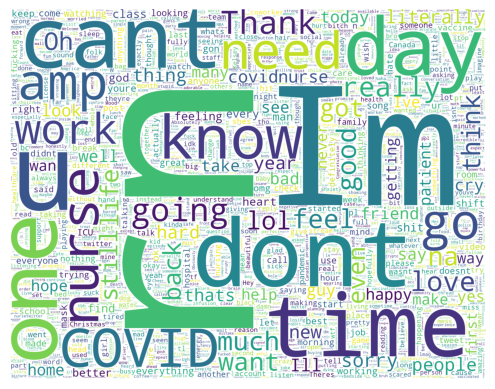

<Figure size 2000x2000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [99]:
wordcloud = WordCloud().generate(comment_words)
# mask = np.array(Image.open('twitter_mask.png'))
wordcloud = WordCloud(
    collocations=False,
    max_words=3000,
    background_color="white",
    width=1800, height=1400,
    # mask=mask,
    stopwords=STOPWORDS,
).generate(comment_words)

plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(20, 20))
plt.show()
plt.savefig('./my_twitter_wordcloud_2.png', dpi=300)
